In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ee1ebbf44bb2999de88531741fff21f469d6f05fa6ceec9f6ed65d00de885e67
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# Bagging

- 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

- 분류기가 predict_proba() 메소드를 지원하는 경우 확률값을 평균하여 예측을 수행

- 없는 경우 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

- 세부적인 매개값을 바꿔줄수 있다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# oob_score : 부스트래핑에 포함되지 않는 샘플을 기반으로 훈련된 모델을 평가
model_ba = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),random_state=0 , oob_score=True , n_estimators=10)

# 평가
model_ba.fit(train_x,train_y)
# 훈련, 테스트, OOB 샘플의 정확도
print(model_ba.score(train_x,train_y),model_ba.score(test_x,test_y),model_ba.oob_score_)

0.9859154929577465 0.972027972027972 0.9178403755868545


In [ ]:
# 특성 중요도 시각화: 결정트리만 지원 특성 중요도는 결정 트리만 있다.
import seaborn as sns


#### Bagging 실습 01

결정트리로 배깅을 수행 (two_moon 데이터 셋 적용)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

# 데이터 로드
x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
train_x,test_x,train_y,test_y = train_test_split(x, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
# BaggingClassifier 모델 학습
# n_estimators=5
from sklearn.tree import DecisionTreeClassifier

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=5,n_jobs = 2,random_state=16,oob_score = True)
model.fit(train_x,train_y)
# 평가

print(model.score(train_x,train_y),model.score(test_x,test_y),model.oob_score_)

1.0 0.92 0.84


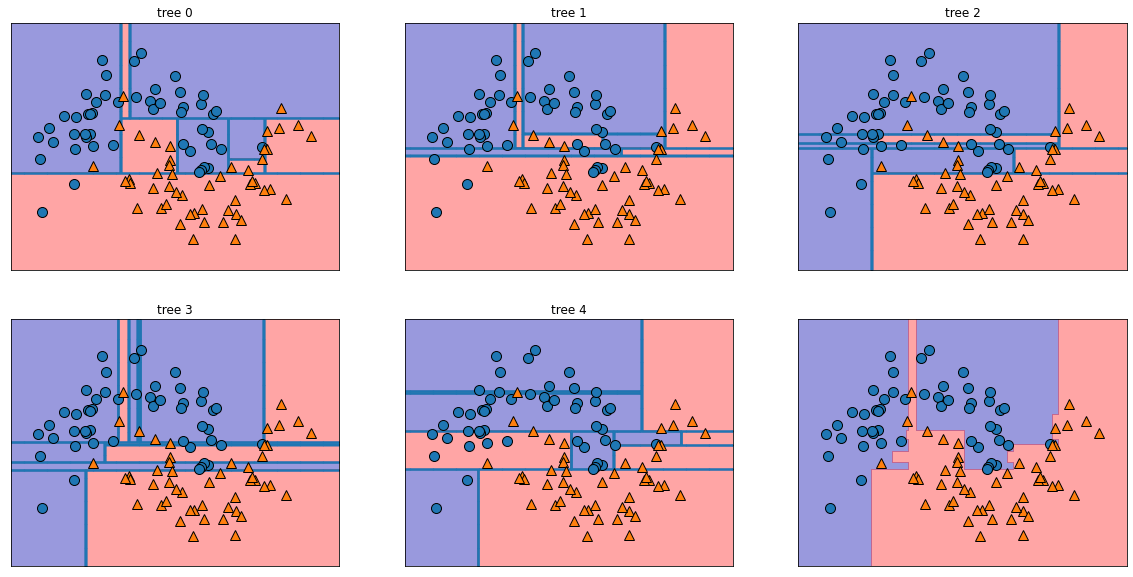

In [ ]:
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for i, (tree, ax) in enumerate( zip(model.estimators_, axes.ravel()) ):
  mglearn.plots.plot_tree_partition(x, y, tree, ax=ax)
  ax.set_title(f'tree {i}')

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, x, ax=axes[-1, -1],fill = True,alpha = 0.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

- n_estimator=100으로 설정한 경우

In [ ]:
# BaggingClassifier 모델 학습
# n_estimator=100으로 설정한 경우
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=100,n_jobs = 2,random_state=16,oob_score = True)

# 평가
model.fit(train_x,train_y)
# 훈련, 테스트, OOB 샘플의 정확도
print(model.score(train_x,train_y),model.score(test_x,test_y),model.oob_score_)

0.9333333333333333 0.92 0.8533333333333334


- 배깅은 랜덤포레스트와 달리 max_samples 매개변수에서 부스트랩 샘플의 크기를 지정할 수 있음
- 랜덤포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어  있음 최적의 임계치 이다.
- 결정트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음 튜닝 할수 없는 파라미터들은 배깅으로 결정트리를 할수 있다.

# Extra Tree

- 랜덤포레스트와 비슷하지만 최적의 임계값을 찾는 대신 후보 특성을 사용해 무작위로 분할한 다음 그중에서 최상의 분할을 선택
- 극단적으로 무작위한 트리의 랜덤 포레스트를 익스트림 랜덤 트리(extremely randomized tree) 또는 줄여서 엑스트라 트리(extra-tree)라고 부름

- 부스트랩 샘플링은 적용하지 않음

- 예측방식은 랜덤포래스트와 동일하게 각 트리가 만든 확률값을 평균

In [ ]:
# ExtraTreesClassifier 모델 학습
from sklearn.ensemble import ExtraTreesClassifier

# 평가
model = ExtraTreesClassifier(random_state=0,max_depth = 5,bootstrap=True,oob_score=True,n_estimators=5,n_jobs = 2).fit(train_x,train_y)
model.score(train_x,train_y) , model.score(test_x,test_y),model.oob_score_

(0.9066666666666666, 0.8, 0.7733333333333333)

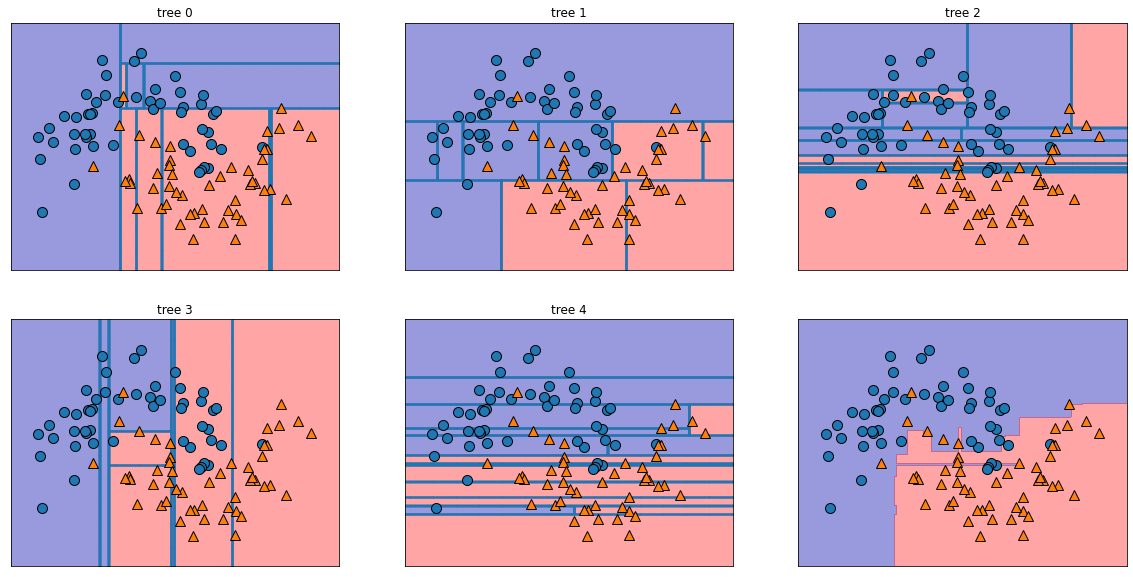

In [ ]:
# 결정 경계 시각화
# 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 10) )
for i, (tree, ax) in enumerate( zip(model.estimators_, axes.ravel()) ):
  mglearn.plots.plot_tree_partition(x, y, tree, ax=ax)
  ax.set_title(f'tree {i}')

# 배깅으로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, x, ax=axes[-1, -1],fill = True,alpha = 0.4)
mglearn.discrete_scatter(x[:,0],x[:,1],y)

#### Extra Tree 실습 01

n_estimator=100으로 설정한 경우 (유방암 데이터 세트에 적용)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

train_x, test_x, train_y, test_y = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

In [ ]:
# ExtraTreesClassifier 모델 학습
model = ExtraTreesClassifier(n_estimators=100,random_state=16,max_depth=7) #학습이 1.0 이런식으로 나오면 depth 를 조절해야 한다.
model.fit(train_x,train_y)
# 평가
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.9929577464788732 0.951048951048951


- 엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냄

- 엑스트라 트리는 계산 비용이 적지만 무작위 분할 때문에 일반화 성능을 높이려면 많은 트리가 필요하다는 문제

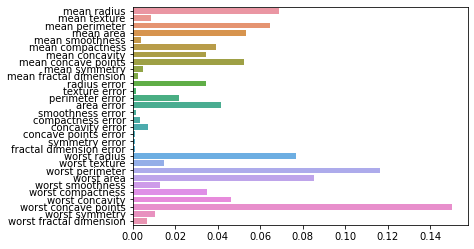

In [ ]:
# 특성 중요도 시각화
import seaborn as sns
sns.barplot(model.feature_importances_,y = cancer.feature_names)
